In [3]:
#importing libraries
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow import keras
import numpy as np

In [7]:
#loading data

fminst = tf.keras.datasets.mnist
(X_train, y_train), (X_test, y_test) = fminst.load_data()

In [8]:
train_images = X_train/255
test_images = y_test/255

In [9]:
print(X_train.shape)
print(y_test.shape)

(60000, 28, 28)
(10000,)


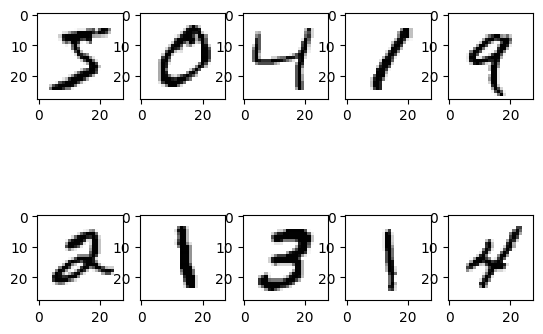

In [10]:
for i in range(10):
    plt.subplot(2, 5, i+1)
    plt.imshow(X_train[i], cmap=plt.cm.binary)
    

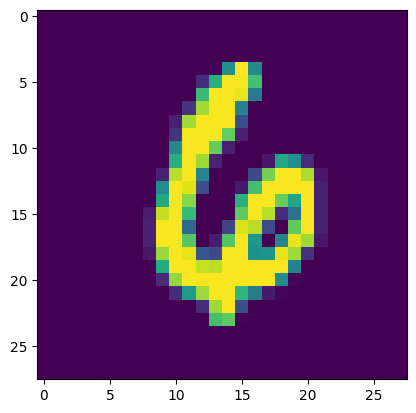

In [40]:
index=39
np.set_printoptions(linewidth=320)
plt.imshow(X_train[index])

In [42]:
#creating model

model = tf.keras.models.Sequential([tf.keras.layers.Flatten(input_shape=(28,28)),
                                    tf.keras.layers.Dense(128,activation=tf.nn.relu),
                                    tf.keras.layers.Dense(10,activation=tf.nn.softmax)])

In [43]:
#compiling model

model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

callback = tf.keras.callbacks.EarlyStopping(monitor='val_loss', patience=3,min_delta=0.00001,mode='auto',verbose=1),



In [44]:
#running the model
hs = model.fit(X_train,y_train, epochs=10,validation_data=(X_test,y_test),callbacks=callback)

Epoch 1/10
1875/1875 [==============================] - 6s 3ms/step - loss: 2.4212 - accuracy: 0.8550 - val_loss: 0.5402 - val_accuracy: 0.8832
Epoch 2/10
1875/1875 [==============================] - 5s 3ms/step - loss: 0.3822 - accuracy: 0.9123 - val_loss: 0.3719 - val_accuracy: 0.9208
Epoch 3/10
1875/1875 [==============================] - 5s 3ms/step - loss: 0.2787 - accuracy: 0.9284 - val_loss: 0.2993 - val_accuracy: 0.9254
Epoch 4/10
1875/1875 [==============================] - 5s 3ms/step - loss: 0.2459 - accuracy: 0.9365 - val_loss: 0.2565 - val_accuracy: 0.9379
Epoch 5/10
1875/1875 [==============================] - 5s 3ms/step - loss: 0.2356 - accuracy: 0.9409 - val_loss: 0.2907 - val_accuracy: 0.9357
Epoch 6/10
1875/1875 [==============================] - 5s 3ms/step - loss: 0.2226 - accuracy: 0.9435 - val_loss: 0.2934 - val_accuracy: 0.9335
Epoch 7/10
1875/1875 [==============================] - 5s 3ms/step - loss: 0.2035 - accuracy: 0.9481 - val_loss: 0.2891 - val_accuracy:

In [45]:
model.evaluate(X_test, y_test, verbose=2)

313/313 - 0s - loss: 0.2891 - accuracy: 0.9379 - 497ms/epoch - 2ms/step


[0.2890762388706207, 0.9379000067710876]

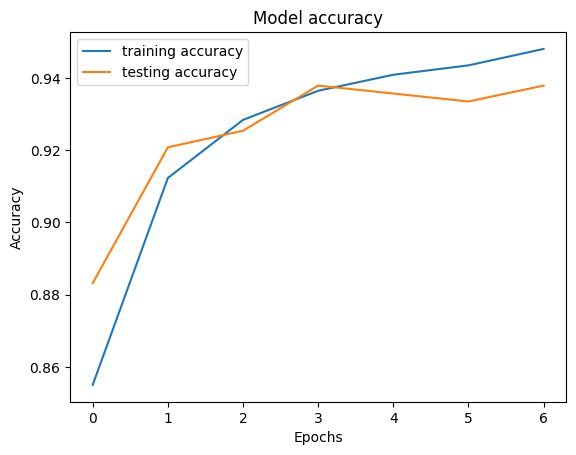

In [46]:
plt.plot(hs.history['accuracy'],label='training accuracy')
plt.plot(hs.history['val_accuracy'],label='testing accuracy')
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epochs')
plt.legend()
plt.show()

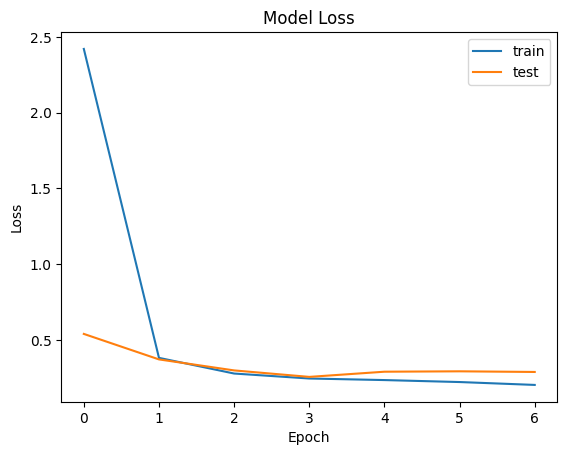

In [47]:
plt.plot(hs.history['loss'],label='train')
plt.plot(hs.history['val_loss'],label='test')
plt.title('Model Loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend()